# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [23]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [25]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [26]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

In [27]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [28]:
# Change the index to 'linename'
df.set_index('linename', inplace=True)

Reset the index: 

In [29]:
# Reset the index
df.reset_index(inplace=True)

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [30]:
# Add a new 'num_lines' column
df['num_lines'] = df['linename'].apply(len)
# Sort the DataFrame by the 'num_lines' column in descending order
df_sorted = df.sort_values(by='num_lines', ascending=False)

# Display the first few rows of the sorted DataFrame
df_sorted.head()


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


Write a function to clean column names: 

In [31]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

In [32]:
#def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    #cleaned = df.columns.str.strip().str.lower().str.replace(' ', '_')
    #return cleaned

In [33]:
# Define the function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

# Display column names before cleaning
print("Before cleaning:", df.columns)

# Apply the function to clean column names
df = clean_column_names(df)

# Display column names after cleaning
print("After cleaning:", df.columns)


Before cleaning: Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')
After cleaning: Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')


In [34]:
# Use the above function to clean the column names


In [35]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [36]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Display the first few rows to verify the changes
df[['date', 'day_of_week']].head()



,date,day_of_week
0,2018-08-25,Saturday
1,2018-08-25,Saturday
2,2018-08-25,Saturday
3,2018-08-25,Saturday
4,2018-08-25,Saturday


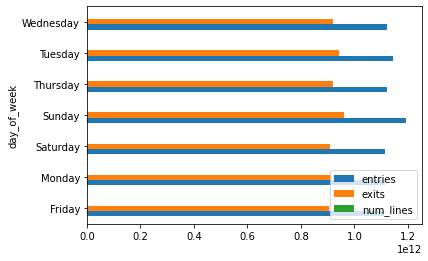

In [37]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [38]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
print(grouped.head())



  day_of_week        entries         exits  num_lines
0      Friday  1110224700078  906799065337      75573
1      Monday  1114237052454  911938153513      76110
2    Saturday  1115661545514  909142081474      74725
3      Sunday  1192306179082  959223750461      75306
4    Thursday  1122723988662  920691927110      76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [39]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].apply(lambda x: weekend_map[pd.to_datetime(x).weekday()])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-05 00:00:00

In [ ]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(columns=['c/a', 'scp'])
df.head(2)

## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
Aggregation Over Time: The data is grouped solely by the day of the week without considering the specific dates or time spans covered. This means that variations in ridership due to holidays, seasonal patterns, or specific events aren’t accounted for. If, for instance, a major event happened on one Saturday in the dataset, it would disproportionately impact the average for all Saturdays.

Uneven Day Coverage: If some days of the week have more records than others (e.g., if certain dates are missing or if the data doesn't cover a complete week consistently), the total counts for those days may not represent a typical weekday or weekend pattern.

Cumulative Counts: Turnstile data often records cumulative entry and exit counts, which means that irregular or sporadic data updates (like missing entries or inconsistent timestamps) could distort the daily totals.

Assumption of Consistent Patterns: The weekday vs. weekend categorization assumes a stable pattern in ridership. However, subway usage on weekends can vary widely based on external factors like weather, events, or temporary station closures, which could make weekend ridership appear unusually high or low.



## Summary

You practiced your data cleanup skills using Pandas.